# BÀI TẬP LỚN MÔN LẬP TRÌNH PYTHON

## NHÓM 7

## Đề tài: Phân tích dữ liệu

### 1. Giới thiệu về tập dữ liệu

Đây là tập dữ liệu về thông tin cơ bản của hơn 3 nghìn khóa học trên Udemy - nền tảng bán khóa học vô cùng phổ biến trên thế giới.

In [1]:
#sử dụng thư viện pandas và đọc file dữ liệu lưu vào trong data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re
import plotly.express as px
import seaborn as sns
data = pd.read_csv("UdemyCourses.csv")
data.head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [97]:
data.shape

(3682, 11)

Dữ liệu gồm 11 cột và 3682 dòng nói về: 

In [98]:
for col in data.columns: 
    print(col)

course_id
course_title
is_paid
price
num_subscribers
num_reviews
num_lectures
level
content_duration
published_timestamp
subject


### II. Kiểm tra và làm sạch tập dữ liệu

In [99]:
#Kiểm tra thông tin tập giá trị
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


Không có giá trị null trong tập dữ liệu.

In [100]:
# Lọc cột content_duration(thời lượng giờ học) đưa về cùng 1 giá trị là hour
for i in data.content_duration.index:
    if('mins' in data.content_duration[i]):
        row = data.content_duration[i]
        row = re.findall(r"[-+]?(?:\d*\.\d+|\d+)", row)
        row = float(np.array(row,dtype=float) / 60.0)
        row = round(row,2)
        data.loc[i, 'content_duration'] = row
    else:
        row = data.content_duration[i]
        row = re.findall(r"[-+]?(?:\d*\.\d+|\d+)", row)
        row = float(np.array(row,dtype=float))
        row = float(row)
        data.loc[i, 'content_duration'] = row


data['content_duration'] = data['content_duration'].astype(float)
data.info()

    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3682 non-null   int64  
 1   course_title         3682 non-null   object 
 2   is_paid              3682 non-null   bool   
 3   price                3682 non-null   object 
 4   num_subscribers      3682 non-null   int64  
 5   num_reviews          3682 non-null   int64  
 6   num_lectures         3682 non-null   int64  
 7   level                3682 non-null   object 
 8   content_duration     3682 non-null   float64
 9   published_timestamp  3682 non-null   object 
 10  subject              3682 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 291.4+ KB


In [101]:
data.describe()

,course_id,num_subscribers,num_reviews,num_lectures,content_duration
count,3.682000e+03,3682.000000,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182,4.182963
std,3.436355e+05,9499.378361,934.957204,50.373299,7.130248
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000
25%,4.078430e+05,110.250000,4.000000,15.000000,1.000000
50%,6.885580e+05,911.500000,18.000000,25.000000,2.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000,4.500000
max,1.282064e+06,268923.000000,27445.000000,779.000000,218.000000


In [102]:
#Chuyển thời gian phát hành thành định dạng ta có thể khai thác được
data['published_timestamp'] = pd.to_datetime(data['published_timestamp'])
data.head(2)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5,2014-09-18 05:07:05+00:00,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1.0,2017-04-12 19:06:34+00:00,Musical Instruments


In [103]:
#Ta sẽ quan tâm đến tháng và năm phát hành của khóa học
data['month_added']=data['published_timestamp'].dt.month
data['year_added'] = data['published_timestamp'].dt.year
data.drop(['published_timestamp'],axis=1,inplace=True)

In [104]:
data.head(2)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,month_added,year_added
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5,Musical Instruments,9,2014
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1.0,Musical Instruments,4,2017


In [105]:
data.describe()

,course_id,num_subscribers,num_reviews,num_lectures,content_duration,month_added,year_added
count,3.682000e+03,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182,4.182963,6.164041,2015.432917
std,3.436355e+05,9499.378361,934.957204,50.373299,7.130248,3.378702,1.185800
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000
25%,4.078430e+05,110.250000,4.000000,15.000000,1.000000,3.000000,2015.000000
50%,6.885580e+05,911.500000,18.000000,25.000000,2.000000,6.000000,2016.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000,4.500000,9.000000,2016.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000,218.000000,12.000000,2017.000000


Từ mô tả tập dữ liệu ta thấy num_lectures(số bài học trong một khóa học) có những dữ liệu bằng 0. Ta cần loại bỏ những dòng dữ liệu này

In [106]:
data[data['num_lectures'] == 0]


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,month_added,year_added
2635,627332,Mutual Funds for Investors in Retirement Accounts,True,20,0,0,0,All Levels,0.0,Business Finance,12,2015
3227,1271684,Test your Knowledge in Banking Credit Analysis...,True,30,17,0,0,All Levels,24.0,Business Finance,6,2017
3228,1259560,Test your knowledge in Basics of Accounting,True,30,1000,11,0,Beginner Level,218.0,Business Finance,6,2017
3229,1270254,Test your Knowledge in Cost Accounting,True,30,999,3,0,All Levels,18.0,Business Finance,6,2017
3230,1259396,Test your knowledge in Financial Management,True,30,20,0,0,All Levels,82.0,Business Finance,6,2017


In [107]:
data = data.drop(data.index[[2635, 3227, 3228, 3229, 3230]])
data.describe()


,course_id,num_subscribers,num_reviews,num_lectures,content_duration,month_added,year_added
count,3.677000e+03,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,6.759852e+05,3198.020125,156.301605,40.119663,4.095640,6.162633,2015.431330
std,3.433189e+05,9505.263339,935.575723,50.385854,6.054281,3.379624,1.185457
min,8.324000e+03,0.000000,0.000000,4.000000,0.130000,1.000000,2011.000000
25%,4.076580e+05,111.000000,4.000000,15.000000,1.000000,3.000000,2015.000000
50%,6.880920e+05,912.000000,18.000000,25.000000,2.000000,6.000000,2016.000000
75%,9.615080e+05,2547.000000,67.000000,46.000000,4.500000,9.000000,2016.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000,78.500000,12.000000,2017.000000


In [108]:
data.drop(['course_id'],axis=1,inplace=True) #Xóa cột này vì không cần phân tích đến

### III.Phân tích các đại lượng

-Các cột dữ liệu định lượng:

+Price: Giá

+num_subscribers: Số người đăng ký

+num_reviews: Số lượt đánh giá

+num_lecture: Số bài học

+content_duration: Thời gian khóa học

+published_timestamp: Thời gian xuất bản

-Các cột dữ liệu định tính:

-is_paid: Có trả phí hay không

-level: Level các khóa học

-subject: Loại khóa học

#### 3.1. Các dữ liệu định tính

In [109]:
#is_paid
data.is_paid.value_counts()


True     3367
False     310
Name: is_paid, dtype: int64

<AxesSubplot: ylabel='is_paid'>

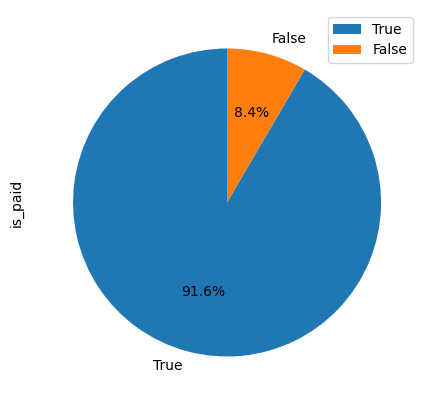

In [110]:
name = {'is_paid': [3372, 310]}
free_paid_courses = pd.DataFrame(name, index=['True', 'False']) 
free_paid_courses.plot.pie(y='is_paid', figsize=(5, 5), autopct='%1.1f%%', startangle=90)

Trong 3677 Khoá học thì có 3367 khóa học trả phí(chiếm 91.6%) và 310 khóa học free(chiếm 8.4%).

=>Như vậy ta thấy số lượng khóa học trả phí gấp hơn 10 lần số lượng khóa học miễn phí.

<AxesSubplot: xlabel='index'>

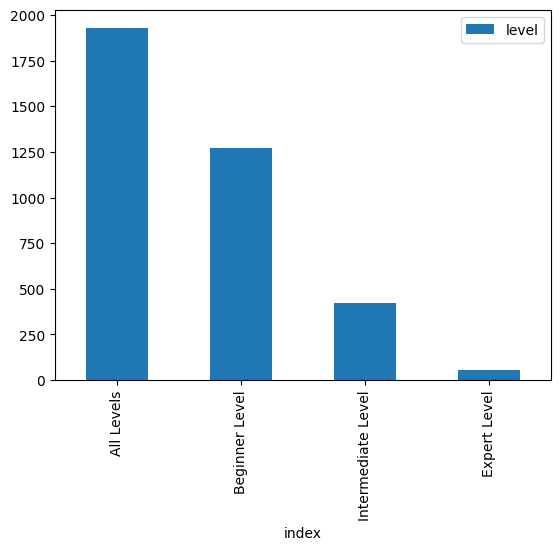

In [111]:
#level
level_courses = data.level.value_counts().reset_index()
level_courses
level_courses.plot(x='index', y='level', kind='bar')

'All level' là những khóa học phổ biến nhất Udemy

'ExpertLevel' là khóa học dành cho các chuyên gia hoặc những người có kiến thức nền tảng và đang muốn học đến mức chuyên gia nên chiếm số lượng ít nhất chỉ với 58 khóa học trong hơn 3 nghìn khóa học

<AxesSubplot: xlabel='index'>

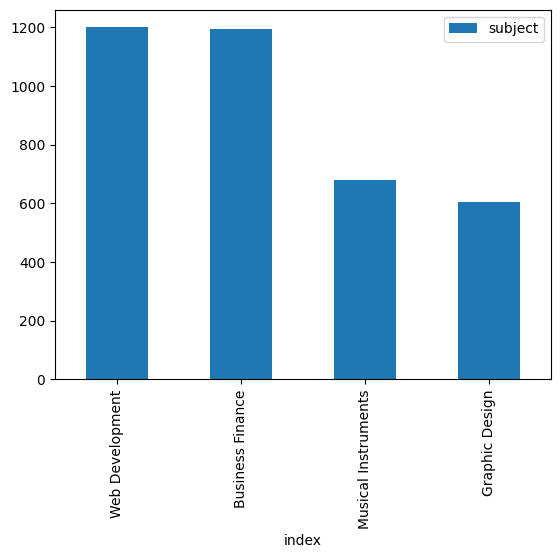

In [112]:
#subject
subject_courses = data.subject.value_counts().reset_index()
subject_courses.plot(x='index', y='subject', kind='bar')

In [113]:
data['tmp'] = 1
fig = px.pie(data, names='subject',values='tmp',hole = 0.6,title='relation tips')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(
    title_text="Subject percentage",
    annotations=[dict(text='course subjects', x=0.5, y=0.5, font_size=20, showarrow=False)])

Tương tự với nhóm các khóa học trên udemy thì nhiều nhất là Web Development và Busines Finance, ít hơn là Musical Instruments và Graphic Design

#### Kết Luận 1: 
+Udemy là nền tảng bán khóa học với nhiều khóa học trả phí và miễn phí nhưng chủ yếu là trả phí.

+Các khóa học trong Udemy phân chia các mức độ để phù hợp với tất cả mọi người(All level, Beginer, Intermediate, Expert) nhưng thường các khóa học của Udemy sẽ phân hóa kiến thức từ dễ cho tới khó, phù hợp với mọi mức độ (All level).

+Hầu hết mọi người thường quan tâm tới những khóa học Web Development và BuisinessFinance hơn các khóa học khác.

#### 3.2.Các dữ liệu định lượng

In [114]:
data.describe()

,num_subscribers,num_reviews,num_lectures,content_duration,month_added,year_added,tmp
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.0
mean,3198.020125,156.301605,40.119663,4.095640,6.162633,2015.431330,1.0
std,9505.263339,935.575723,50.385854,6.054281,3.379624,1.185457,0.0
min,0.000000,0.000000,4.000000,0.130000,1.000000,2011.000000,1.0
25%,111.000000,4.000000,15.000000,1.000000,3.000000,2015.000000,1.0
50%,912.000000,18.000000,25.000000,2.000000,6.000000,2016.000000,1.0
75%,2547.000000,67.000000,46.000000,4.500000,9.000000,2016.000000,1.0
max,268923.000000,27445.000000,779.000000,78.500000,12.000000,2017.000000,1.0


Do có khá nhiều dữ liệu định lượng trong tập dữ liệu nhưng để bài phân tích có ý nghĩa, chúng em xin phép chỉ tập trung phân tích một bài dữ liệu chính và có giá trị khai thác cao.

In [115]:

#Price
subset_price = data[data['price'] != 'Free']
subset_price['price'] = subset_price['price'].astype(float)
_data = subset_price #tạo ra một bảng sao chép dữ liệu sau khi đã lọc giá Free
subset_price.describe()


C:\Users\tuann\AppData\Local\Temp\ipykernel_19336\1075246378.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,price,num_subscribers,num_reviews,num_lectures,content_duration,month_added,year_added,tmp
count,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.000000,3367.0
mean,72.144342,2430.530146,131.476982,41.841699,4.269177,6.198099,2015.425007,1.0
std,60.216281,6361.122957,926.201674,52.024454,6.250187,3.395099,1.178740,0.0
min,20.000000,0.000000,0.000000,4.000000,0.130000,1.000000,2011.000000,1.0
25%,25.000000,89.500000,4.000000,15.000000,1.500000,3.000000,2015.000000,1.0
50%,50.000000,735.000000,15.000000,26.000000,2.500000,6.000000,2016.000000,1.0
75%,100.000000,2056.500000,53.000000,48.000000,4.500000,9.000000,2016.000000,1.0
max,200.000000,121584.000000,27445.000000,779.000000,78.500000,12.000000,2017.000000,1.0


In [116]:
subset_price = subset_price['price']
subset_price = subset_price.to_frame()

<AxesSubplot: >

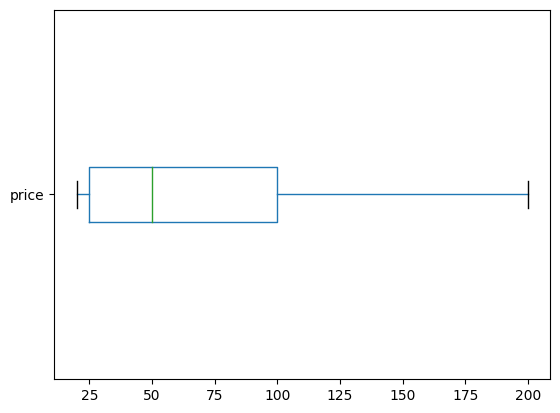

In [117]:
subset_price.boxplot(column =['price'], grid = False, vert = False)

array([[<AxesSubplot: title={'center': 'price'}>]], dtype=object)

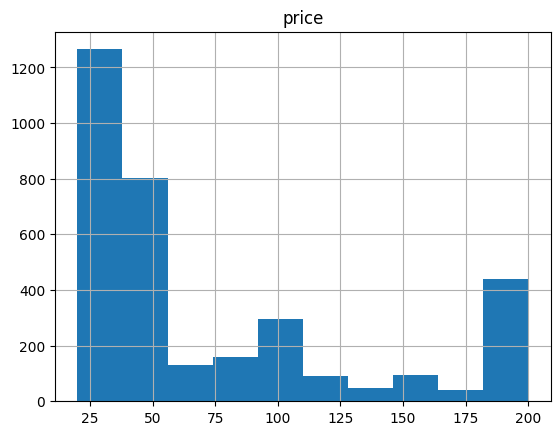

In [118]:
subset_price.hist('price', bins = 10)

Nhìn biểu đồ ta thấy: Giá thấp nhất khoảng dưới 25$ cho một khóa học trả phí, cao nhất là 200$.Trung bình là khoảng  50$.
Biểu đồ tập trung không đồng đều, thường tập trung về phía bên trái(dưới 100$). 
Các khóa học của Udemy thường có giá dưới 100$. Tập trung nhiều nhất ở trong đoạn từ 20 -> 50$. Theo mình đánh giá thì đây không phải một mức giá quá đắt, đủ để người dùng mới tiếp cận được.

In [119]:
_data = _data.sort_values('price', ascending = False)
#Top 10 khóa học có giá cao nhất trong tập dữ liệu
_data.head(10)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,month_added,year_added,tmp
3182,Suonare la Chitarra,True,200.0,1,1,22,All Levels,1.0,Musical Instruments,6,2017,1
2691,Penny Stocks King: How 2 really Trade Penny St...,True,200.0,1085,17,48,All Levels,6.0,Business Finance,2,2017,1
242,"Ajax in JavaScript and JQuery, with PHP - Crea...",True,200.0,3399,85,15,All Levels,1.5,Web Development,7,2015,1
797,Complete Codeigniter: From Beginner to Advanced,True,200.0,2786,31,20,All Levels,3.0,Web Development,1,2017,1
454,"Beginner Full Stack Web Development: HTML, CSS...",True,200.0,2687,331,138,Beginner Level,25.5,Web Development,3,2017,1
1434,Get Started With Penny Stocks -Step by Step Gu...,True,200.0,7159,61,18,All Levels,2.0,Business Finance,6,2014,1
1436,Get to know HTML Learn HTML Basics,True,200.0,10674,102,26,Beginner Level,2.0,Web Development,11,2016,1
1445,Getting started with JavaScript,True,200.0,1415,17,23,Beginner Level,1.5,Web Development,6,2017,1
3166,Straddle Options Trading - Profit in Any Marke...,True,200.0,837,9,19,All Levels,1.0,Business Finance,10,2016,1
2722,Photoshop for Entrepreneurs - Design 11 Practi...,True,200.0,36288,737,63,All Levels,5.0,Graphic Design,6,2016,1


<AxesSubplot: >

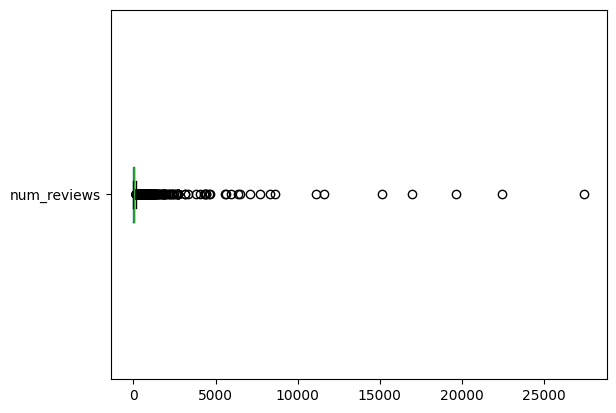

In [120]:
#Num_Reviews
subset_numreview = data['num_reviews'].astype(float)
subset_numreview = subset_numreview.to_frame()
max(subset_numreview['num_reviews'])
subset_numreview.boxplot(column =['num_reviews'], grid = False, vert = False)

Nhìn vào biểu đồ trên ta thấy do có khá nhiều giá trị ngoại biên nên chúng ta rất khó đọc biểu đồ. Trong trường hợp này, mình sẽ sử dụng phương pháp phát hiện ngoại lệ IQR để loại bớt các giá trị ngoại biên. Cụ thể ta sẽ phân tích tập dữ liệu trong khoảng[Q1 - 1.5 * IQR; Q3 + 1.5 * IQR]
Với Q1: Tứ phân vị 1
Q3: Tứ phân vị 3
IQR = Q3 - Q1

In [121]:
subset_numreview.describe()

,num_reviews
count,3677.000000
mean,156.301605
std,935.575723
min,0.000000
25%,4.000000
50%,18.000000
75%,67.000000
max,27445.000000


<AxesSubplot: >

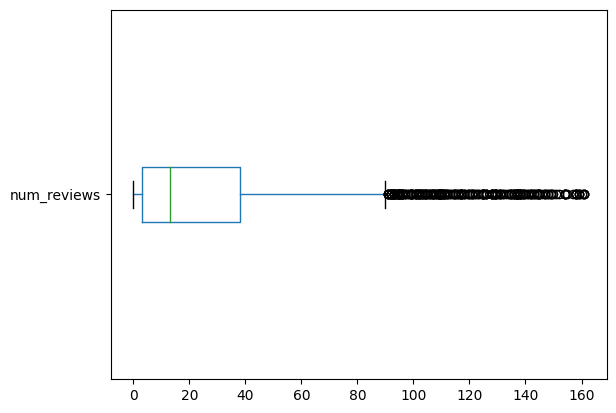

In [122]:
Q1 = 4
Q2 = 67
IQR = 67 - 4
subset_numreview2 = subset_numreview[subset_numreview['num_reviews'] < (67 + 1.5 * IQR)]
subset_numreview2.boxplot(column =['num_reviews'], grid = False, vert = False)


array([[<AxesSubplot: title={'center': 'num_reviews'}>]], dtype=object)

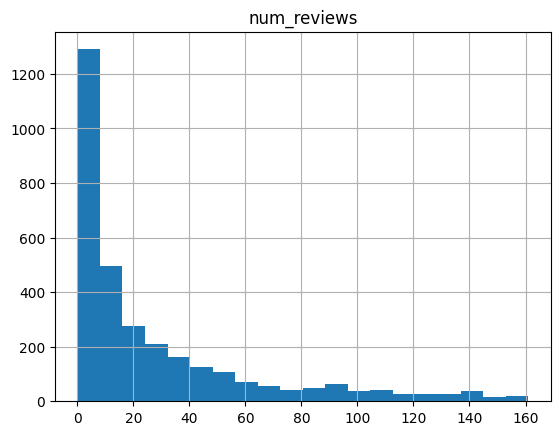

In [123]:
subset_numreview2.hist('num_reviews', bins = 20)

Giờ biểu đồ đã dễ quan sát hơn và chúng ta sẽ có những đánh giá khách quan về nó như sau:
Hình dáng của biểu đồ không đối xứng, tập trung nhiều về bên trái. Cụ thể là trong đoạn từ 0-> 40. Nhiều giá trị ngoại biên. Phân phối của tập dữ liệu là không đều.

=> Từ đây, ta có thể đưa ra một kết luận là các khóa học thường có không quá nhiều lượt reviews từ phía người học

In [124]:
#Top 10 khóa học có số lượt reviews cao nhất
data.sort_values('num_reviews', ascending = False).head(10)

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,month_added,year_added,tmp
3385,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43.0,Web Development,11,2015,1
3316,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5,Web Development,3,2016,1
285,Angular 4 (formerly Angular 2) - The Complete ...,True,190,73783,19649,329,All Levels,22.0,Web Development,2,2016,1
2034,JavaScript: Understanding the Weird Parts,True,175,79612,16976,85,All Levels,11.5,Web Development,3,2015,1
2610,Modern React with Redux,True,180,50815,15117,150,All Levels,26.5,Web Development,12,2015,1
2118,Learn and Understand AngularJS,True,175,59361,11580,55,All Levels,7.0,Web Development,9,2014,1
2119,Learn and Understand NodeJS,True,195,58208,11123,98,All Levels,13.0,Web Development,8,2015,1
2230,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5,Web Development,2,2013,1
281,Angular 2 with TypeScript for Beginners: The P...,True,150,40070,8341,194,All Levels,9.5,Web Development,3,2016,1
2829,Pianoforall - Incredible New Way To Learn Pian...,True,200,75499,7676,362,All Levels,30.0,Musical Instruments,8,2014,1


#### 3.3 Phân tích đa biến

In [125]:
# Biểu đồ hộp và râu thể hiện mối quan hệ giữa Course Price và Subject
paid_courses_data = _data.query("price != 'Free'")
paid_courses_data['price'] = _data['price'].astype(float)
fig = px.box(paid_courses_data,
             x     = 'subject',
             y     = 'price',
             color = 'subject',
             title = 'Course Prices x Subject',
             color_discrete_sequence = ['#03cffc','#0362fc','#eb03fc','#0ecc83'],
            )

fig.update_layout(showlegend=False)
fig.update_yaxes(range=[0,220], title='Course Price')
fig.update_xaxes(title='Course Subject')
fig.show()

In [126]:
level_by_year=_data.groupby('year_added')['level'].value_counts().reset_index(level=0).rename(columns={'level':'level count'}, index={'index':'Level_of_Courses'})
fig=px.line(level_by_year, x='year_added', y='level count', color=level_by_year.index, title='Udemy Courses by level in each year')
fig.show()

=> All Level, Beginner, Intermediate tăng dân từ 2011 -> 2016 và giảm dần trong năm 2017.
Expert Level có sự gia tăng quá nhiều.

In [127]:
#Biểu đồ thể hiện mối quan hệ giữa level Course và Số lượt người đăng ký
px.scatter(_data, x = 'num_subscribers', y = 'level', size = 'num_subscribers', hover_name = 'subject', color = 'subject', 
           color_discrete_sequence=px.colors.qualitative.Alphabet, template = 'plotly_dark',
           animation_frame = 'year_added', title = 'Level Course VS No.of Subcribers')

Giờ chúng ta sẽ không phân tích sâu cụ thể vào loại dữ liệu mà ta sẽ trả lời cho một số câu hỏi:
1. Giá cao có ảnh hưởng đến lượt người đăng ký không?
2. Giá có ảnh hưởng tới đánh giá không?
3. Giá có ảnh hưởng tới thời lượng khóa học không?
4. Thời lượng khóa học có ảnh hưởng tới người đăng ký không?
5. Khóa học với nhiều người đăng ký thì có chắc là nhiều lượt đánh giá hơn không?

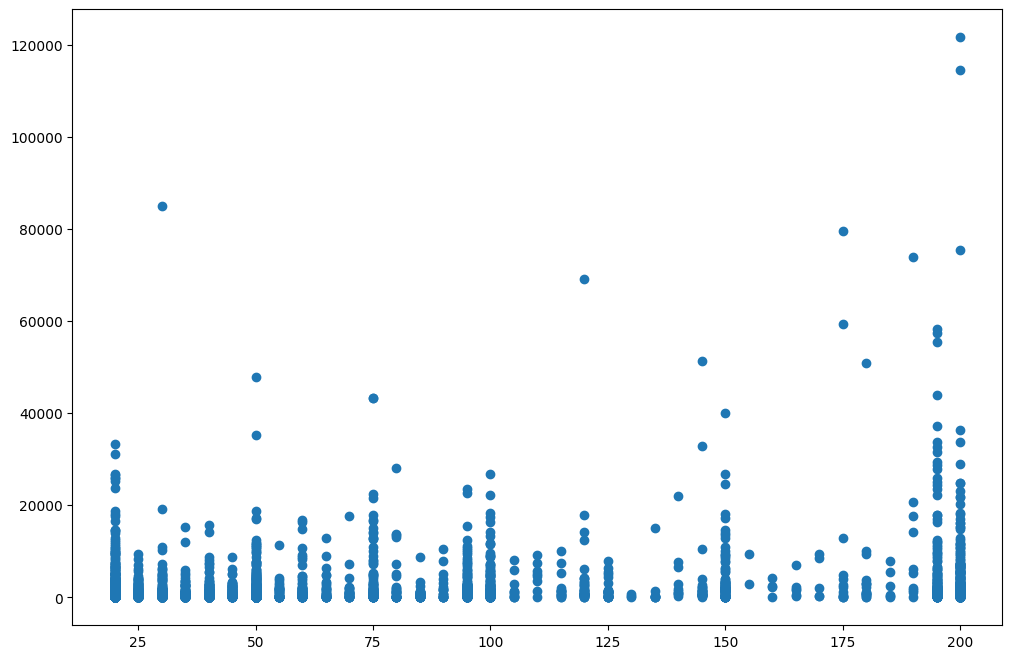

In [128]:
plt.figure(figsize=(12,8))
plt.scatter(_data['price'],_data['num_subscribers'])

=> Giá cao không ảnh hưởng tới lượt người đăng ký

<AxesSubplot: xlabel='price', ylabel='num_reviews'>

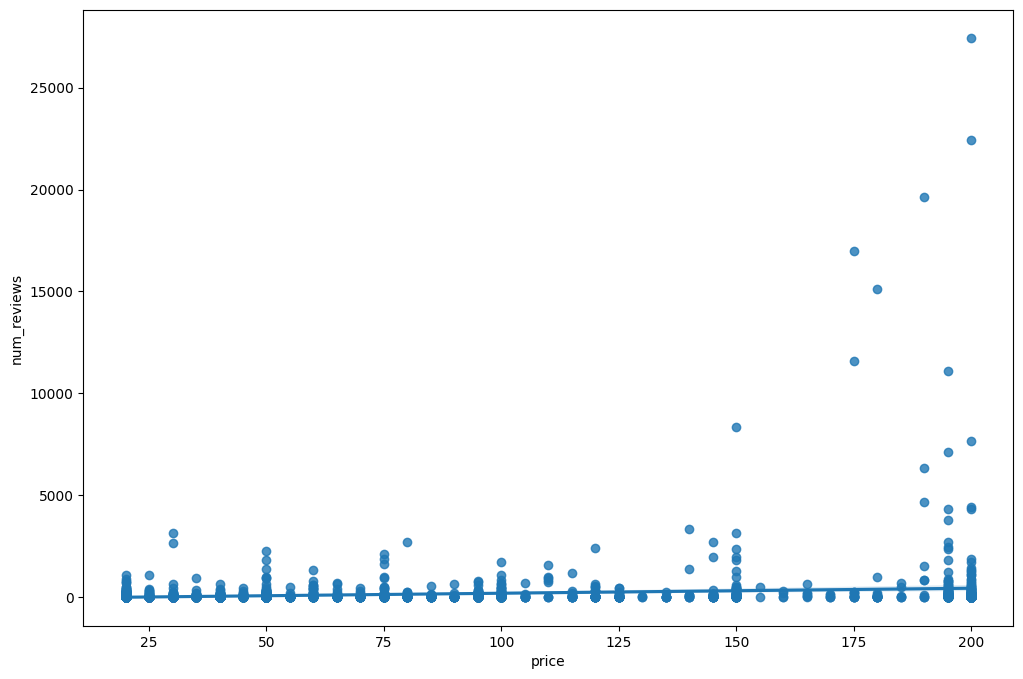

In [129]:
plt.figure(figsize=(12,8))
sns.regplot(x="price" , y="num_reviews" , data=_data)

Giá không ảnh hưởng tới số lượt đánh giá.

<AxesSubplot: xlabel='price', ylabel='content_duration'>

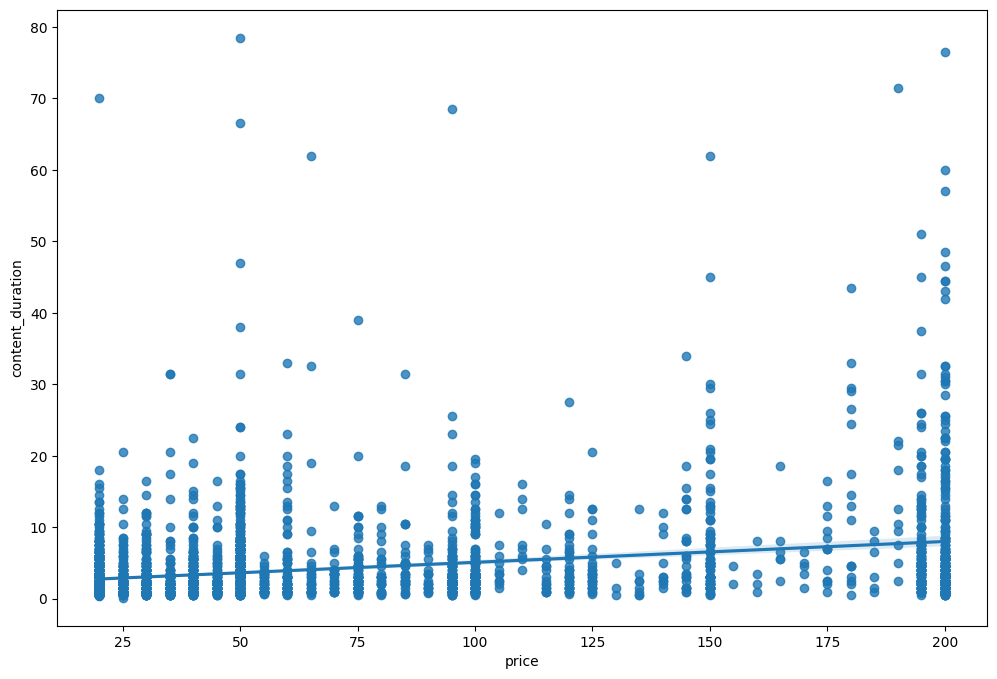

In [130]:
plt.figure(figsize=(12,8))
sns.regplot(x="price" , y="content_duration" , data=_data)

Giá tiền không quá ảnh hưởng tới thời lượng học.

<AxesSubplot: xlabel='content_duration', ylabel='num_subscribers'>

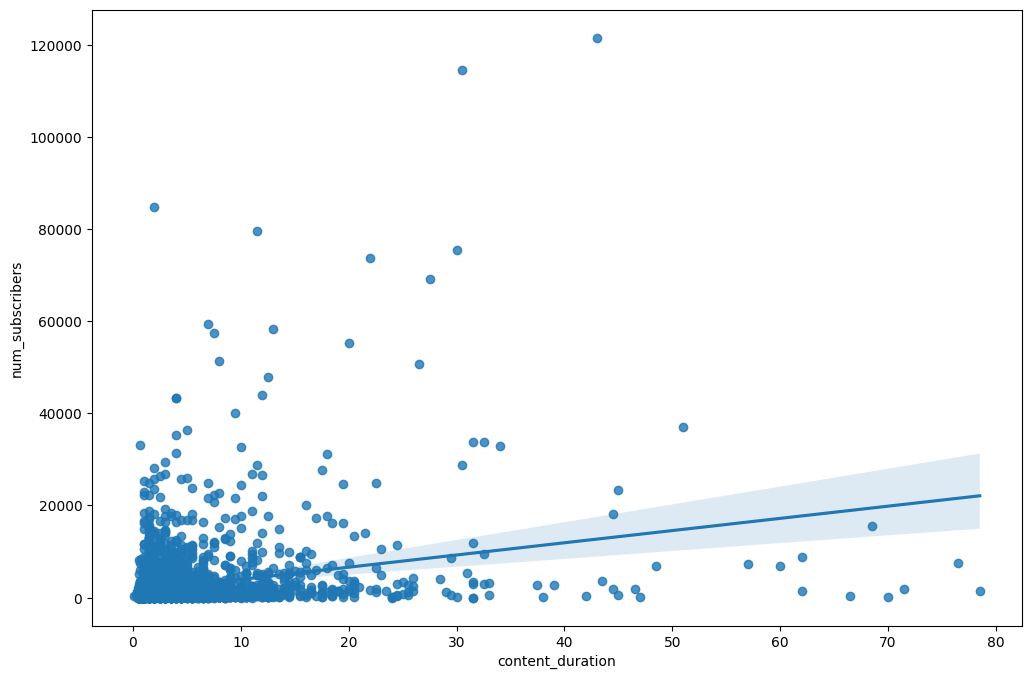

In [131]:
plt.figure(figsize=(12,8))
sns.regplot(x="content_duration" , y="num_subscribers" , data=_data)   

Thời lượng khóa học có ảnh hưởng tới số lượng người đăng ký.

<AxesSubplot: xlabel='num_subscribers', ylabel='num_reviews'>

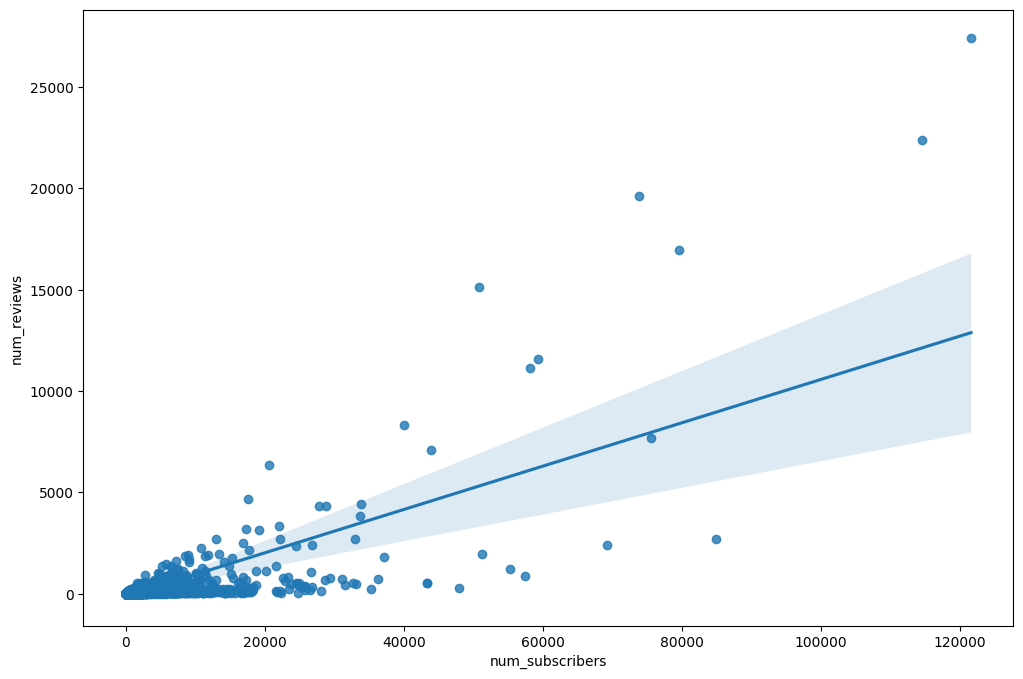

In [132]:
plt.figure(figsize=(12,8))
sns.regplot(x="num_subscribers" , y="num_reviews" , data=_data)

Số lượt người đăng ký có ảnh hưởng đến số lượt người đánh giá .